# **IBL - Processed Widefield Imaging Data**

This tutorial shows how to access data from <[DANDI:00XXXX](https://dandiarchive.org/dandiset/00XXXX/draft)> for the IBL widefield dataset.

## Study Overview

[TODO add description]

## Contents

1. [Setup and Data Access](#setup)
2. [Session and Subject Metadata](#metadata)
3. [Processed Imaging Data and Metadata](#processed)
4. [Landmarks](#landmarks)

---

# 1. Setup and Data Access <a id="setup"></a>

## Import Required Libraries

In [1]:
# Core data manipulation and analysis

# Visualization
import matplotlib.pyplot as plt

# NWB access
from pynwb import read_nwb

# Configure matplotlib
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

## Read NWB file from local path

You can read the NWB file from a local path using `pynwb.read_nwb()`.

In [2]:
subject_id = "CSK-im-011"  # Example subject
session_id = "84565bbe-fd4c-4bdb-af55-968d46a4c424"  # EID for the session

# Read NWB file from local path
nwbfile_path = f"/Volumes/T9/data/IBL/nwbfiles/processed/sub-{subject_id}_ses-{session_id}.nwb"
nwbfile = read_nwb(nwbfile_path)

print("=== SESSION INFORMATION ===")
print(f"Experiment description:\n {nwbfile.experiment_description}")
print(f"Session description:\n {nwbfile.session_description}")
print(f"Session start time:\n {nwbfile.session_start_time}")

print("\n=== SUBJECT INFORMATION ===")
print(f"ID: {nwbfile.subject.subject_id}")
print(f"Age: {nwbfile.subject.age}")
print(f"Strain: {nwbfile.subject.species}")
print(f"Genotype: {nwbfile.subject.genotype}")
print(f"Sex: {nwbfile.subject.sex}")

=== SESSION INFORMATION ===
Experiment description:
 None
Session description:
 A rich text description of the experiment. Can also just be the abstract of the publication.
Session start time:
 2020-01-01 00:00:00-05:00

=== SUBJECT INFORMATION ===
ID: a_subject_id
Age: TBD
Strain: Mus musculus
Genotype: None
Sex: U


---

# 3. Processed Imaging Data and Metadata <a id="processed"></a>

## Fluorescence - Temporal components

The uncorrected fluorescence data are stored in the `ophys` processing module as `RoiResponseSeries` and `RoiResponseSeriesIsosbestic` objects within the "Fluorescence" container.

Data shape
- Arrays are shaped `(time, num_rois)` — the first dimension is time (frame), the second is the number of ROIs.

Series names
- Calcium (470 nm): `RoiResponseSeries`
- Isosbestic (405 nm): `RoiResponseSeriesIsosbestic`

Access example
```python
response_series = nwbfile.processing["ophys"]["Fluorescence"]["RoiResponseSeries"]
```

In [6]:
print(f"=== FLUORESCENCE TRACES: ===")
print("-" * 100)
fluorescence_module = nwbfile.processing["ophys"]["Fluorescence"]
for _, roi_response in fluorescence_module.roi_response_series.items():
    print(f"Trace: {roi_response.name}")
    print("-" * 100)
    print(f"   Description: {roi_response.description}")
    print(f"   Number of ROIs: {roi_response.data.shape[1]}")
    print(f"   Duration: {roi_response.timestamps[-1] - roi_response.timestamps[0]:.2f} seconds")
    print("-" * 100)

=== FLUORESCENCE TRACES: ===
----------------------------------------------------------------------------------------------------
Trace: RoiResponseSeries
----------------------------------------------------------------------------------------------------
   Description: Raw fluorescence traces for widefield calcium imaging from Blue light (470 nm) excitation.
   Number of ROIs: 200
   Duration: 4989.12 seconds
----------------------------------------------------------------------------------------------------
Trace: RoiResponseSeriesIsosbestic
----------------------------------------------------------------------------------------------------
   Description: Raw fluorescence traces for widefield calcium imaging from Violet light (405 nm) excitation.
   Number of ROIs: 200
   Duration: 4989.12 seconds
----------------------------------------------------------------------------------------------------


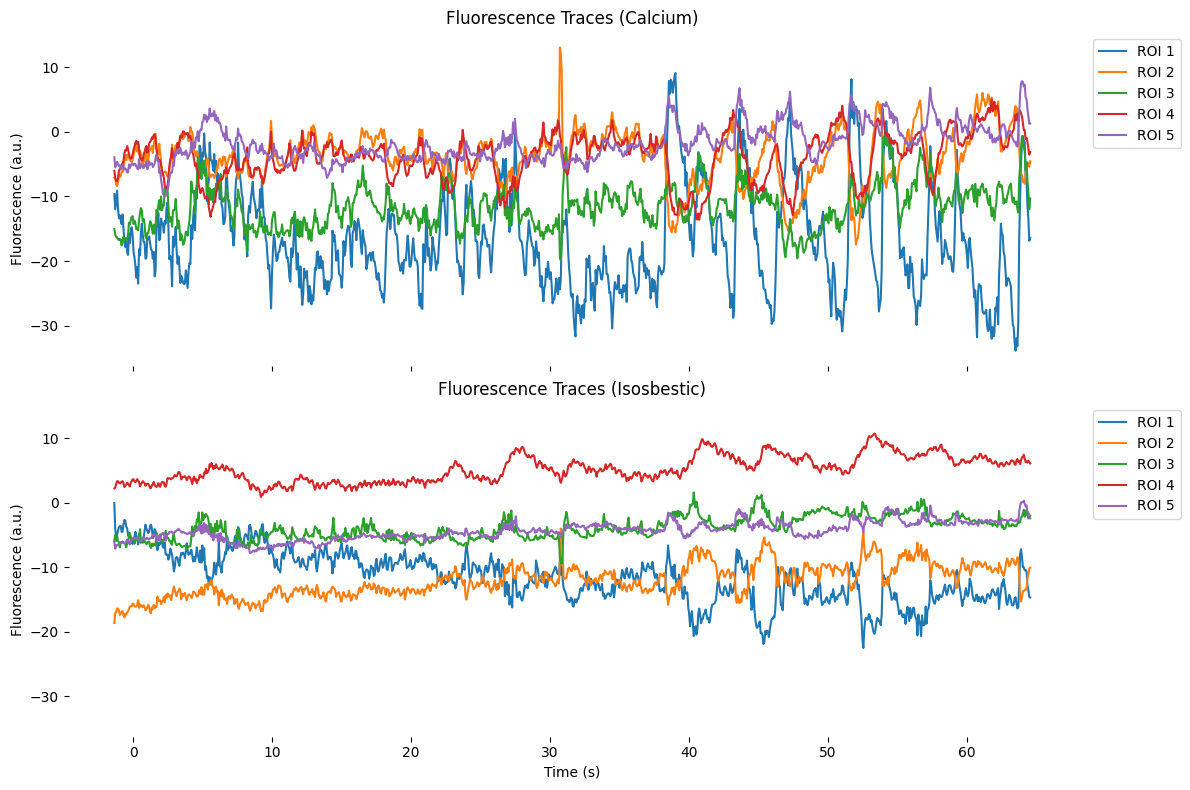

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True, sharey=True)

roi_response = fluorescence_module.roi_response_series["RoiResponseSeries"]
time = roi_response.timestamps[:1000]  # First 1000 time points
for roi_idx in range(5):  # Plot first 5 ROIs
    ax[0].plot(time, roi_response.data[:1000, roi_idx], label=f'ROI {roi_idx+1}')
ax[0].set_title('Fluorescence Traces (Calcium)')
ax[0].set_ylabel('Fluorescence (a.u.)')
ax[0].legend(bbox_to_anchor=(1.01, 1), loc='upper left')
ax[0].set_frame_on(False)

roi_response_iso = fluorescence_module.roi_response_series["RoiResponseSeriesIsosbestic"]
for roi_idx in range(5):  # Plot first 5 ROIs
    ax[1].plot(time, roi_response_iso.data[:1000, roi_idx], label=f'ROI {roi_idx+1}')
ax[1].set_title('Fluorescence Traces (Isosbestic)')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Fluorescence (a.u.)')
ax[1].legend(bbox_to_anchor=(1.01, 1), loc='upper left')
ax[1].set_frame_on(False)
plt.tight_layout()

In [11]:
print(f"=== SEGMENTED ROIS: ===")
print("-" * 100)
segmentation_module = nwbfile.processing["ophys"]["ImageSegmentation"]
for _, plane_segmentation in segmentation_module.plane_segmentations.items():
    print(f"Plane Segmentation: {plane_segmentation.name}")
    print("-" * 100)
    print(f"   Description: {plane_segmentation.description}")
    print(f"   Linked Imaging Plane: {plane_segmentation.imaging_plane.name}")
    print(f"   ROIs properties: {plane_segmentation.colnames}")
    print("-" * 100)

=== SEGMENTED ROIS: ===
----------------------------------------------------------------------------------------------------
Plane Segmentation: PlaneSegmentationCalcium
----------------------------------------------------------------------------------------------------
   Description: Spatial components of segmented ROIs for widefield calcium imaging.
   Linked Imaging Plane: ImagingPlaneCalcium
   ROIs properties: ('roi_name', 'image_mask', 'ROICentroids', 'Accepted', 'Rejected')
----------------------------------------------------------------------------------------------------
Plane Segmentation: PlaneSegmentationIsosbestic
----------------------------------------------------------------------------------------------------
   Description: Spatial components of segmented ROIs for widefield calcium imaging.
   Linked Imaging Plane: ImagingPlaneIsosbestic
   ROIs properties: ('roi_name', 'image_mask', 'ROICentroids', 'Accepted', 'Rejected')
--------------------------------------------